In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Notes only

In [2]:
notes_train = pd.read_csv('notes_train.csv', index_col=0)
notes_test = pd.read_csv('notes_test.csv', index_col=0)

In [3]:
notes_train.head()

,subject_id,0,1,2,3,4,5,6,7,8,...,1610,1611,1612,1613,1614,1615,1616,1617,1618,target
599,32658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
613,42327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
312,17735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
964,27390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,43737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
notes_train.shape[1]

1621

In [5]:
notes_train.shape[0] + notes_test.shape[0]

1560

In [6]:
X_train = notes_train.drop('target', axis=1)
y_train = notes_train['target']

X_test = notes_test.drop('target', axis=1)
y_test = notes_test['target']

In [7]:
models = [
          LogisticRegression(max_iter=1000, C=3),
          RandomForestClassifier(max_depth=15),
          KNeighborsClassifier(n_neighbors=3),
          SVC(),
         ]

In [8]:
accuracies = []
# predictions = []
sensitivities = []
specificities = []

for model in models:
    print('Testing ' + str(model))
    # _ = model.fit(X_train, y_train)

    acc = cross_val_score(model, X_train, y_train, cv=5)

    # pred = model.predict(X_test)
    sensitivity = make_scorer(recall_score)
    specificity = make_scorer(recall_score, pos_label=0)

    sens = cross_val_score(model, X_train, y_train, cv=5, scoring=sensitivity)
    spec = cross_val_score(model, X_train, y_train, cv=5, scoring=specificity)

    accuracies.append(acc)
    # predictions.append(pred)
    sensitivities.append(sens)
    specificities.append(spec)


Testing LogisticRegression(C=3, max_iter=1000)
Testing RandomForestClassifier(max_depth=15)
Testing KNeighborsClassifier(n_neighbors=3)
Testing SVC()


In [9]:
notes_train['target'].value_counts()
# notes_test['target'].value_counts()

1.0    548
0.0    544
Name: target, dtype: int64

In [10]:
mean_acc = [i.mean() for i in accuracies]
mean_sens = [i.mean() for i in sensitivities]
mean_spec = [i.mean() for i in specificities]

In [11]:
notes_comp = pd.DataFrame({'Mean CV Accuracy': mean_acc,
'Mean CV Sensitivity': mean_sens,
'Mean CV Specificity': mean_spec}, index=['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
)

Diagnosis + Medication Data (Structured)

In [12]:
diagmed_train = pd.read_csv('medication_diagnosis_train.csv', index_col=0)
diagmed_test = pd.read_csv('medication_diagnosis_test.csv', index_col=0)

In [13]:
diagmed_train.head()

,subject_id,0,1,2,3,4,5,6,7,8,...,3254,3255,3256,3257,3258,3259,3260,3261,3262,target
599,32658,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
613,42327,0.0,0.0,0.0,0.01099,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
312,17735,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
964,27390,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,43737,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
diagmed_train.shape[1]

3265

In [15]:
diagmed_train.shape[0] + diagmed_test.shape[0]

1560

In [16]:
X_train = diagmed_train.drop('target', axis=1)
y_train = diagmed_train['target']

X_test = diagmed_test.drop('target', axis=1)
y_test = diagmed_test['target']

In [17]:
accuracies = []
# predictions = []
sensitivities = []
specificities = []

for model in models:
    print('Testing ' + str(model))
    # _ = model.fit(X_train, y_train)

    acc = cross_val_score(model, X_train, y_train, cv=5)

    # pred = model.predict(X_test)
    sensitivity = make_scorer(recall_score)
    specificity = make_scorer(recall_score, pos_label=0)

    sens = cross_val_score(model, X_train, y_train, cv=5, scoring=sensitivity)
    spec = cross_val_score(model, X_train, y_train, cv=5, scoring=specificity)

    accuracies.append(acc)
    # predictions.append(pred)
    sensitivities.append(sens)
    specificities.append(spec)


Testing LogisticRegression(C=3, max_iter=1000)
Testing RandomForestClassifier(max_depth=15)
Testing KNeighborsClassifier(n_neighbors=3)
Testing SVC()


In [18]:
mean_acc = [i.mean() for i in accuracies]
mean_sens = [i.mean() for i in sensitivities]
mean_spec = [i.mean() for i in specificities]

In [19]:
diagmed_comp = pd.DataFrame({'Mean CV Accuracy': mean_acc,
'Mean CV Sensitivity': mean_sens,
'Mean CV Specificity': mean_spec}, index=['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
)

All data

In [20]:
all_train = pd.read_csv('medication_diagnosis_notes_train.csv', index_col=0)
all_test = pd.read_csv('medication_diagnosis_notes_test.csv', index_col=0)

In [21]:
all_train.head()

,subject_id,0,1,2,3,4,5,6,7,8,...,4459,4460,4461,4462,4463,4464,4465,4466,4467,target
599,32658,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
613,42327,0.0,0.0,0.0,0.01099,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
312,17735,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
964,27390,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,43737,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
all_train.shape[1]

4470

In [23]:
all_train.shape[0] + all_test.shape[0]

1560

In [24]:
X_train = all_train.drop('target', axis=1)
y_train = all_train['target']

X_test = all_test.drop('target', axis=1)
y_test = all_test['target']

In [25]:
accuracies = []
# predictions = []
sensitivities = []
specificities = []

for model in models:
    print('Testing ' + str(model))
    # _ = model.fit(X_train, y_train)

    acc = cross_val_score(model, X_train, y_train, cv=5)

    # pred = model.predict(X_test)
    sensitivity = make_scorer(recall_score)
    specificity = make_scorer(recall_score, pos_label=0)

    sens = cross_val_score(model, X_train, y_train, cv=5, scoring=sensitivity)
    spec = cross_val_score(model, X_train, y_train, cv=5, scoring=specificity)

    accuracies.append(acc)
    # predictions.append(pred)
    sensitivities.append(sens)
    specificities.append(spec)


Testing LogisticRegression(C=3, max_iter=1000)
Testing RandomForestClassifier(max_depth=15)
Testing KNeighborsClassifier(n_neighbors=3)
Testing SVC()


In [26]:
mean_acc = [i.mean() for i in accuracies]
mean_sens = [i.mean() for i in sensitivities]
mean_spec = [i.mean() for i in specificities]

In [27]:
all_comp = pd.DataFrame({'Mean CV Accuracy': mean_acc,
'Mean CV Sensitivity': mean_sens,
'Mean CV Specificity': mean_spec}, index=['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
)

In [28]:
notes_comp.round(4)

,Mean CV Accuracy,Mean CV Sensitivity,Mean CV Specificity
Logistic Regression,0.4982,0.0000,1.0000
Random Forest,0.5842,0.7263,0.4301
KNN,0.4506,0.4636,0.4375
SVM,0.5595,0.7645,0.3529


In [29]:
diagmed_comp.round(4)

,Mean CV Accuracy,Mean CV Sensitivity,Mean CV Specificity
Logistic Regression,0.4982,0.0000,1.0000
Random Forest,0.8288,0.8412,0.8382
KNN,0.4515,0.4636,0.4393
SVM,0.5595,0.7645,0.3529


In [30]:
all_comp.round(4)

,Mean CV Accuracy,Mean CV Sensitivity,Mean CV Specificity
Logistic Regression,0.4982,0.0000,1.0000
Random Forest,0.8334,0.8285,0.8309
KNN,0.4515,0.4636,0.4393
SVM,0.5595,0.7645,0.3529


In [44]:
sens_df = pd.DataFrame({'Clinical Notes': notes_comp['Mean CV Sensitivity'],
                'Med + Dx': diagmed_comp['Mean CV Sensitivity'],
                'Clinical Notes + Med + Dx': all_comp['Mean CV Sensitivity']})

spec_df = pd.DataFrame({'Clinical Notes': notes_comp['Mean CV Specificity'],
                'Med + Dx': diagmed_comp['Mean CV Specificity'],
                'Clinical Notes + Med + Dx': all_comp['Mean CV Specificity']})

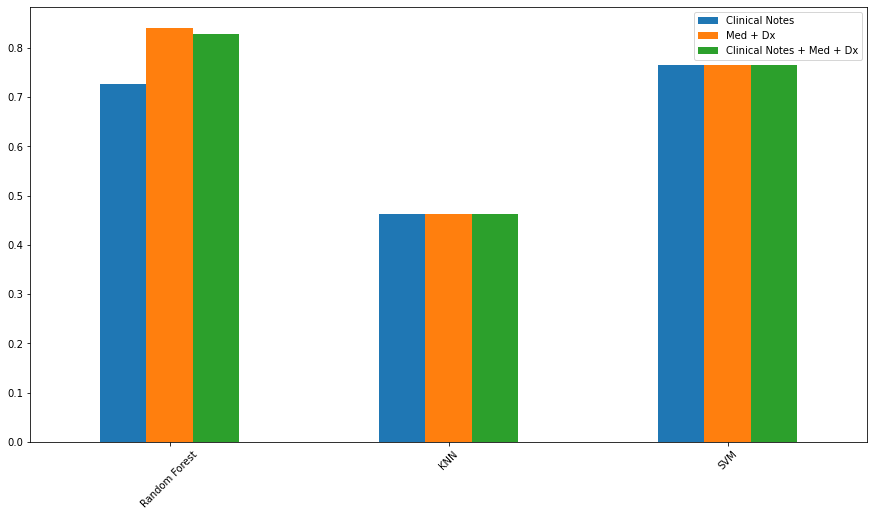

In [51]:
sens_df.drop('Logistic Regression').plot.bar(figsize=(15,8))
plt.xticks(rotation = 45)
plt.savefig('sens_comp', bbox_inches = 'tight')
plt.show()

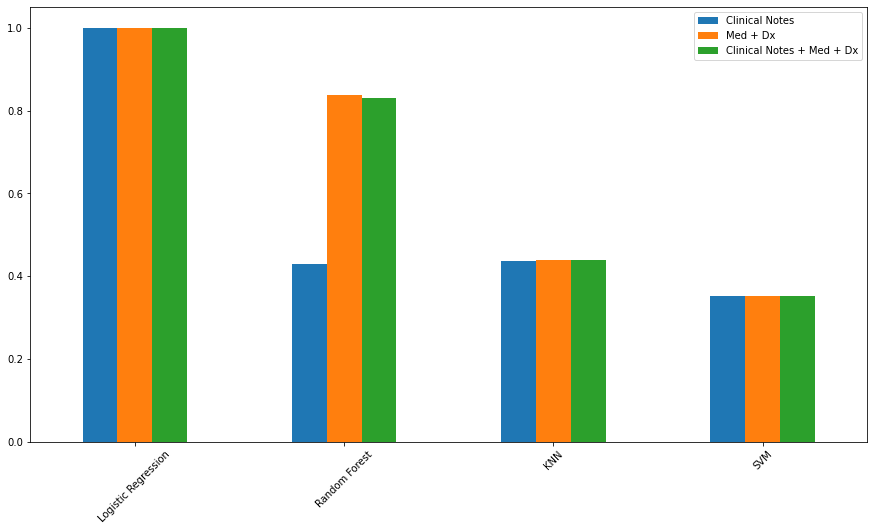

In [50]:
spec_df.plot.bar(figsize=(15,8))
plt.xticks(rotation = 45)
plt.savefig('spec_comp', bbox_inches = 'tight')
plt.show()